# Boston House Price Prediction

This notebook analyzes the Boston Housing dataset to predict house prices using Linear Regression.

## Dataset Description
The dataset contains information about various features that might affect housing prices in Boston. Each record has the following attributes:
- CRIM: Crime rate
- ZN: Proportion of residential land zoned
- INDUS: Proportion of non-retail business acres
- CHAS: Charles River dummy variable
- NOX: Nitric oxides concentration
- RM: Average number of rooms
- AGE: Proportion of owner-occupied units built prior to 1940
- DIS: Weighted distances to employment centres
- RAD: Index of accessibility to radial highways
- TAX: Full-value property-tax rate
- PTRATIO: Pupil-teacher ratio
- B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks
- LSTAT: % lower status of the population
- PRICE: Median value of owner-occupied homes in $1000's

## 1. Setup and Data Loading
Import required libraries and load the dataset

In [34]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Set style for better visualizations
# plt.style.use('seaborn')
sns.set_theme(style="whitegrid")

## Lets load the Boston House Pricing Dataset

In [35]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])

target = raw_df.values[1::2, 2]


# 
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
                 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

# Creating dataframe
boston_df = pd.DataFrame(data, columns=feature_names)


boston_df['PRICE'] = target


<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_4874/2372197707.py:5: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


In [36]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [37]:
# Lets check the description of the dataset
print(boston_df.describe())



             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [38]:
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [39]:
# dataframe information
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [40]:
### EXploratory Data Analysis
## Correlation
boston_df.corr()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


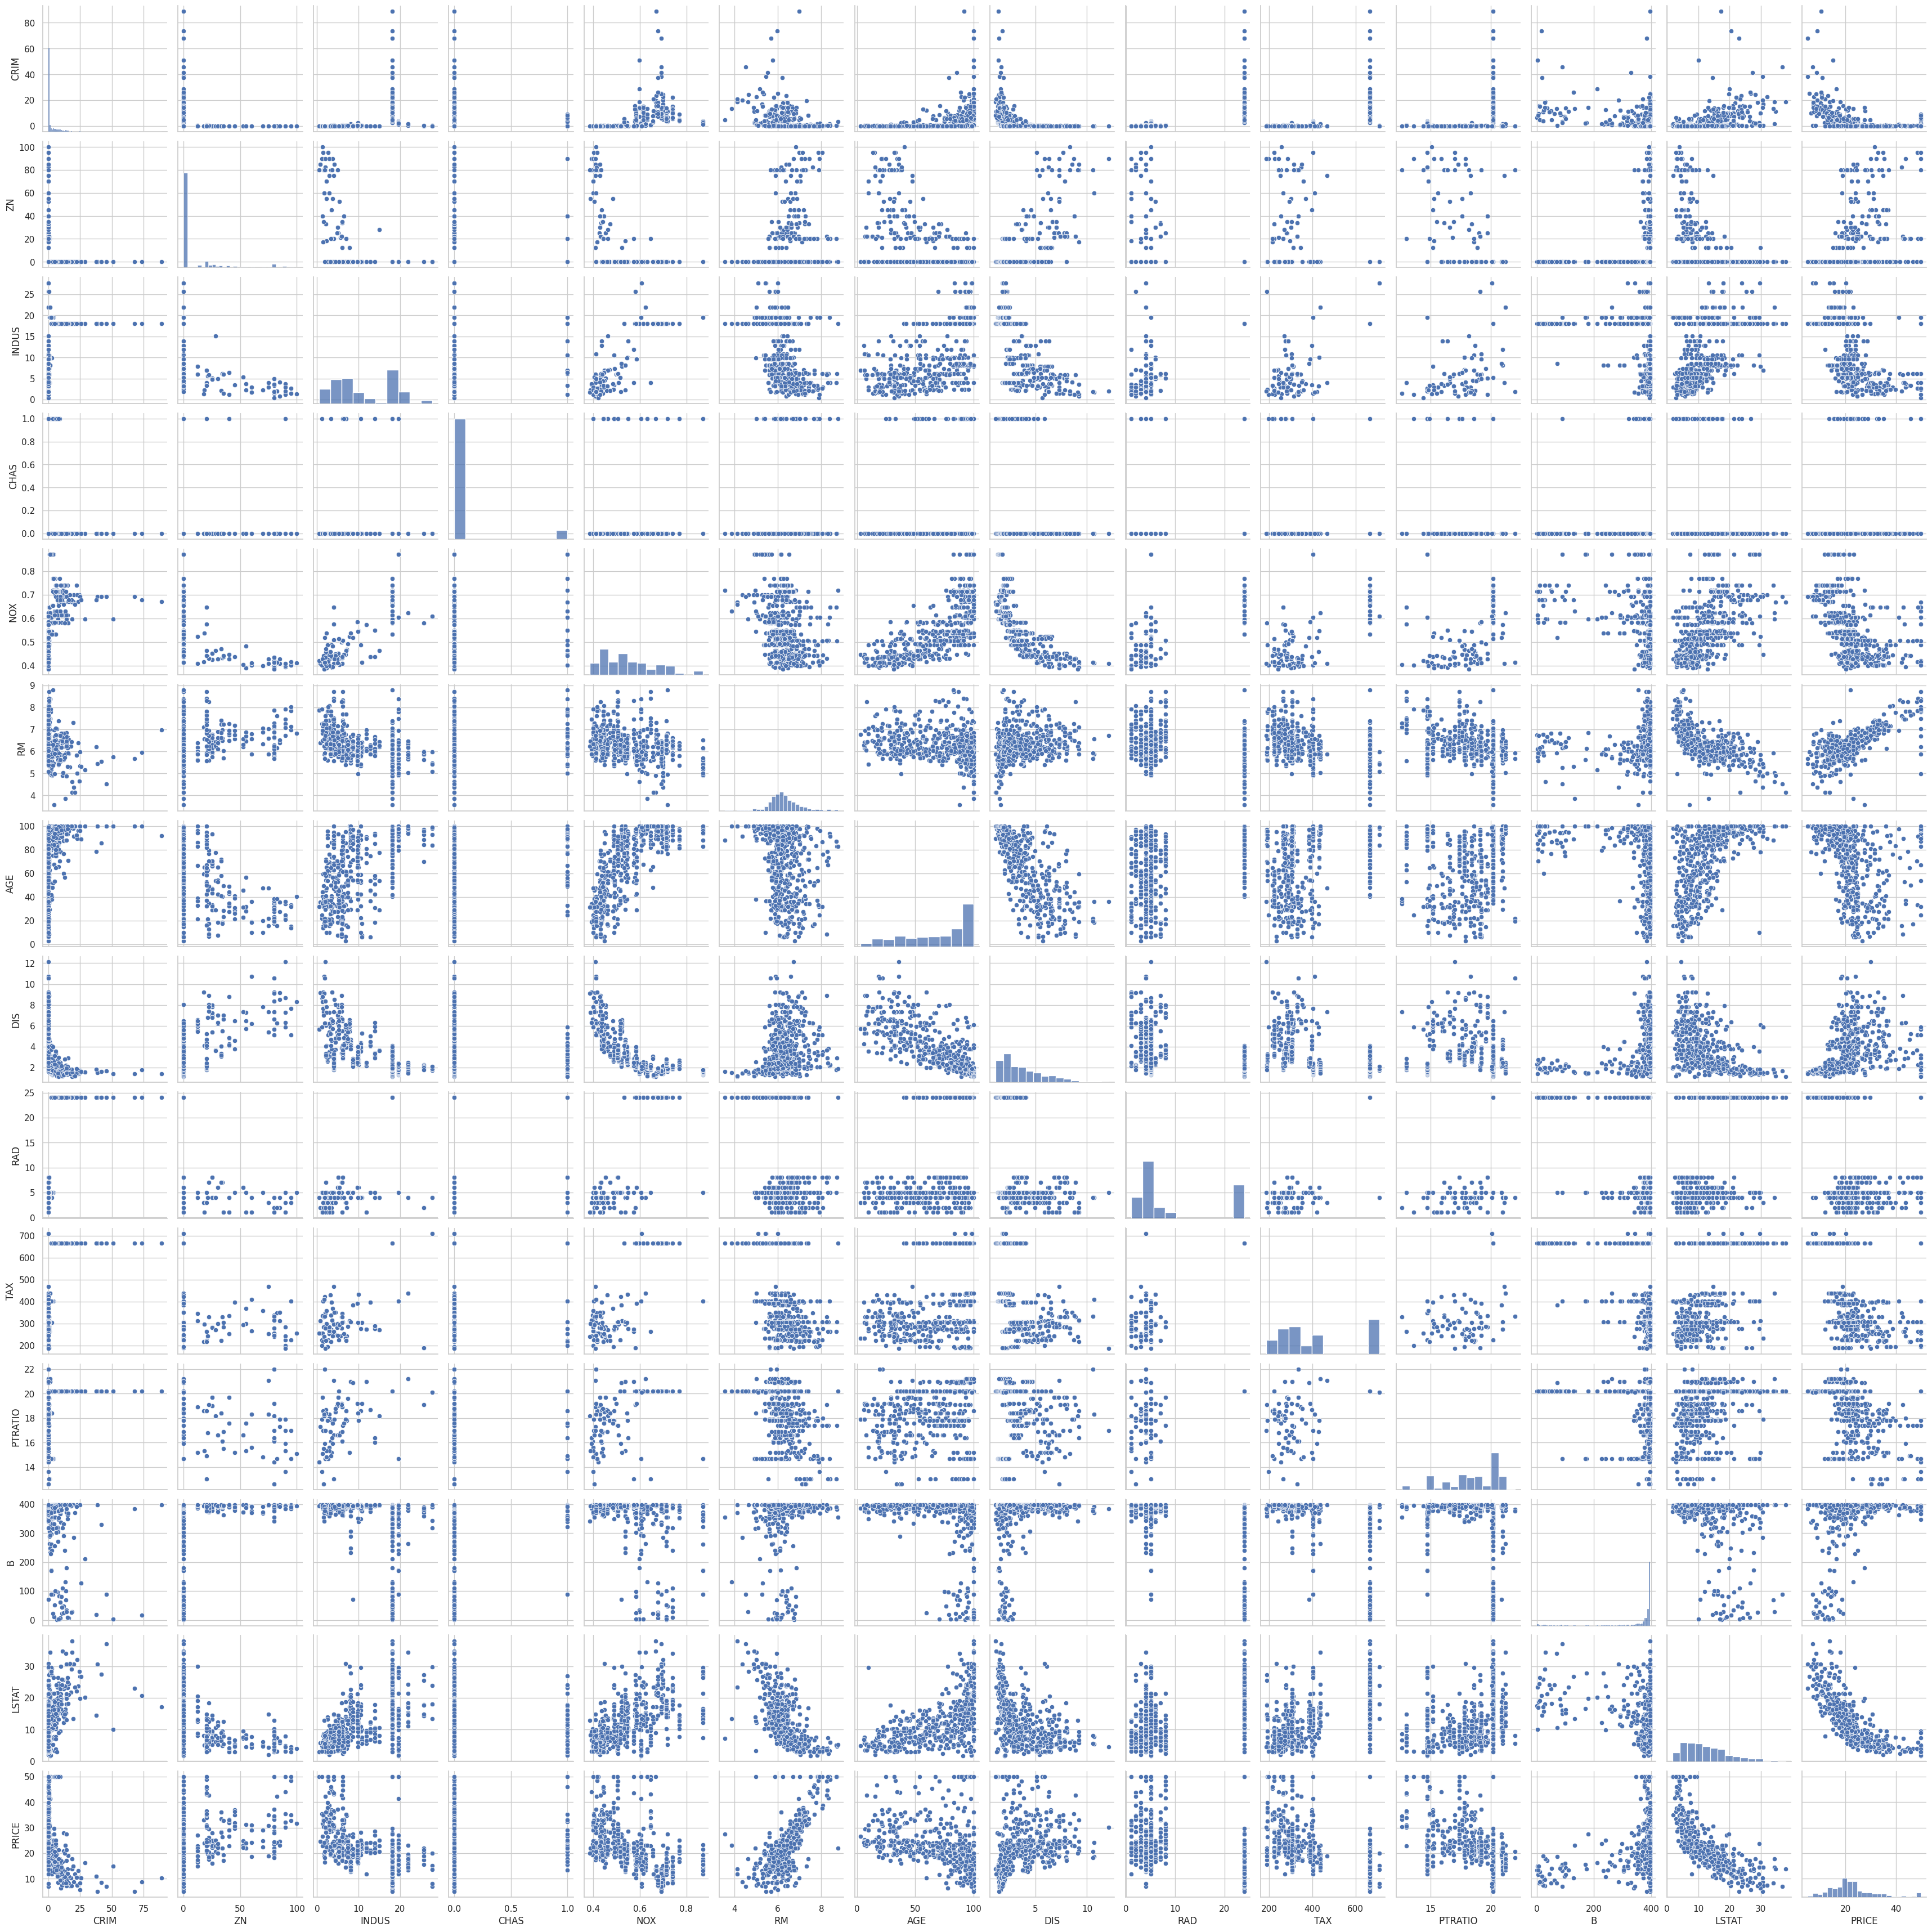

In [11]:
import seaborn as sns
sns.pairplot(boston_df)

### Analyzing The Correlated Features


In [17]:
boston_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Text(0.5, 1.0, 'Distribution between price and CRIM')

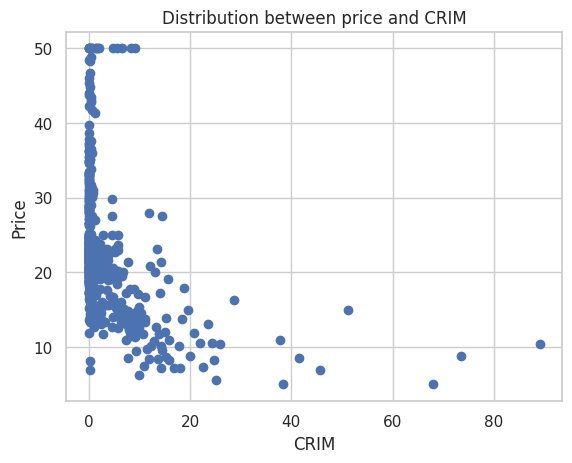

In [18]:
plt.scatter(data= boston_df, x = 'CRIM', y='PRICE')
plt.xlabel("CRIM")
plt.ylabel("Price")

plt.title("Distribution between price and CRIM")

Text(0.5, 1.0, 'Distribution between price and RM')

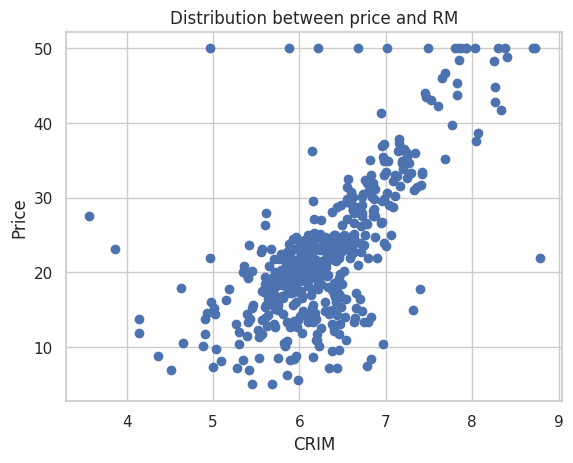

In [19]:
plt.scatter(data= boston_df, x = 'RM', y='PRICE')
plt.xlabel("CRIM")
plt.ylabel("Price")

plt.title("Distribution between price and RM")

<Axes: xlabel='RM', ylabel='PRICE'>

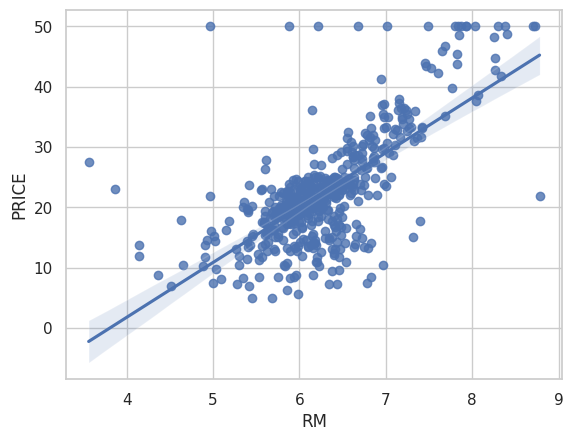

In [20]:
import seaborn as sns
sns.regplot(x="RM",y="PRICE",data=boston_df)



<Axes: xlabel='LSTAT', ylabel='PRICE'>

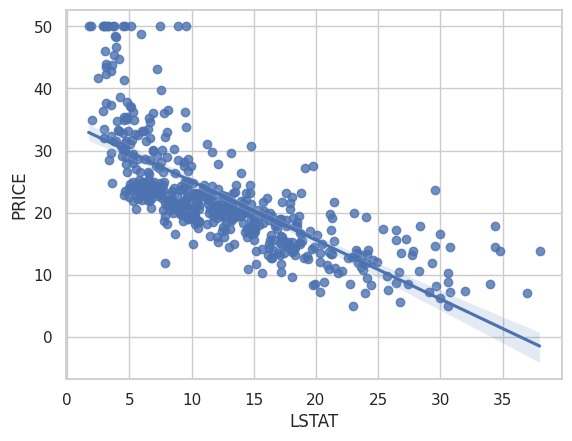

In [21]:
sns.regplot(x="LSTAT",y="PRICE",data=boston_df)

<Axes: xlabel='CHAS', ylabel='PRICE'>

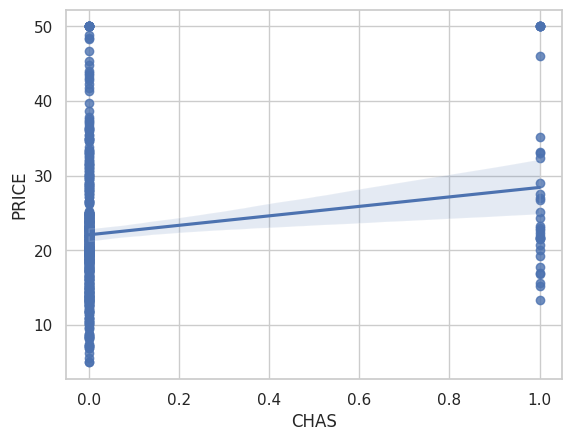

In [22]:
sns.regplot(x="CHAS",y="PRICE",data=boston_df)

## 2. Data Preprocessing and Model Training

In this section, we'll:
1. Split the data into training and testing sets
2. Scale the features
3. Train the linear regression model

In [41]:
# Split features and target
X = boston_df.iloc[:,:-1]  # Features
y = boston_df.iloc[:,-1]   # Target (PRICE)

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [42]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [43]:
import pickle

pickle.dump(scaler, open("scaling.pkl", 'wb'))

In [44]:
# Initialize and train the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)



LinearRegression()

In [45]:
# Make predictions
y_pred = model.predict(X_test_scaled)

## 3. Model Evaluation

Let's evaluate our model using various metrics and visualizations:

Model Performance Metrics:
--------------------------------------------------
Mean Absolute Error: $3.16k
Root Mean Squared Error: $4.64k
R² Score: 0.711


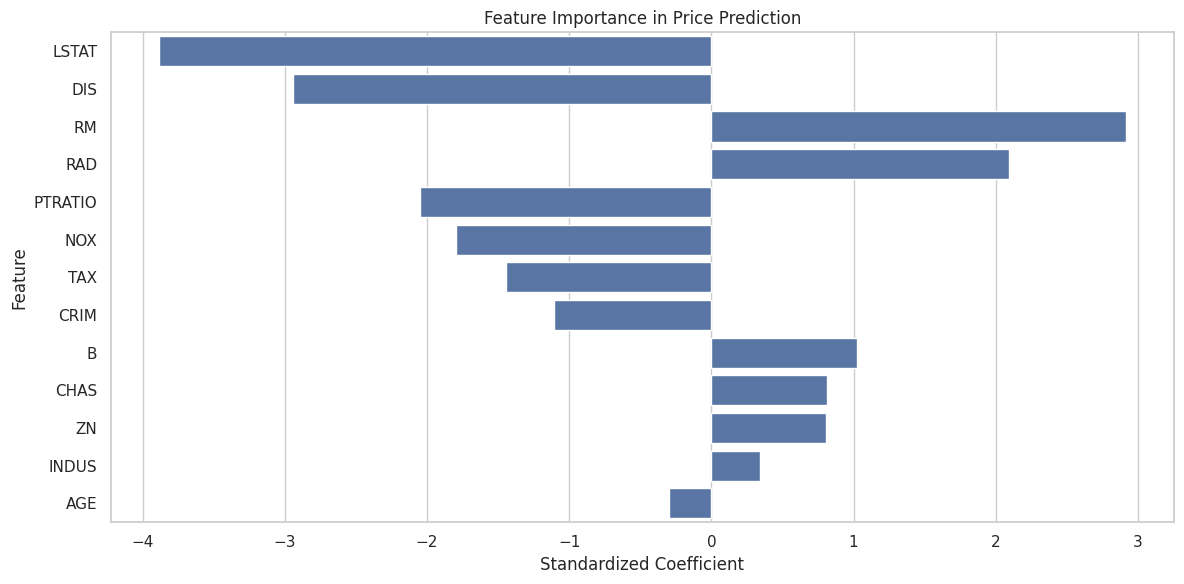

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Model Performance Metrics:')
print('-' * 50)
print(f'Mean Absolute Error: ${mae:.2f}k')
print(f'Root Mean Squared Error: ${rmse:.2f}k')
print(f'R² Score: {r2:.3f}')

# Feature importance analysis
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': model.coef_
})
importance_df = importance_df.sort_values('Coefficient', key=abs, ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(data=importance_df, x='Coefficient', y='Feature')
plt.title('Feature Importance in Price Prediction')
plt.xlabel('Standardized Coefficient')
plt.tight_layout()
plt.show()

## 4. Making New Predictions

Function to make predictions on new data:

In [54]:
def predict_price(features_dict):
    """
    Make price predictions for new house data.
    
    Parameters:
    features_dict (dict): Dictionary containing feature values
    
    Returns:
    float: Predicted price in $1000s
    """
    # Convert input to DataFrame
    features = pd.DataFrame([features_dict])
    
    # Ensure all features are present in correct order
    features = features.reindex(columns=feature_names)
    
    # Scale features
    features_scaled = scaler.transform(features)
    
    # Make prediction
    prediction = model.predict(features_scaled)[0]
    
    return prediction

# Example usage:
sample_house = {
    'CRIM': 0.00632,
    'ZN': 18.0,
    'INDUS': 2.31,
    'CHAS': 0,
    'NOX': 0.538,
    'RM': 6.575,
    'AGE': 65.2,
    'DIS': 4.0900,
    'RAD': 1,
    'TAX': 296,
    'PTRATIO': 15.3,
    'B': 396.90,
    'LSTAT': 4.98
}

predicted_price = predict_price(sample_house)
print(f'Predicted house price: ${predicted_price:.2f}k')

Predicted house price: $30.09k


## Pickling The Model and Scaler for Deployment

We'll save both the trained model and the scaler since we need both for making predictions.

In [55]:
import pickle
# After training your model
with open('regmodel.pkl', 'wb') as f:
    pickle.dump(model, f)  # save the model object directly, not in a dictionary

In [56]:
# Loading pickle file
with open('regmodel.pkl', 'rb') as f:
    loaded_data = pickle.load(f)



## Testing the Saved Model
Let's load our saved model and make sure it works correctly

In [57]:
# Load the saved model and scaler
import pickle

# Load the model
with open('regmodel.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Load the scaler
with open('scaling.pkl', 'rb') as f:
    loaded_scaler = pickle.load(f)

# Test with the same sample house data we used before
sample_house = {
    'CRIM': 0.00632,
    'ZN': 18.0,
    'INDUS': 2.31,
    'CHAS': 0,
    'NOX': 0.538,
    'RM': 6.575,
    'AGE': 65.2,
    'DIS': 4.0900,
    'RAD': 1,
    'TAX': 296.0,
    'PTRATIO': 15.3,
    'B': 396.90,
    'LSTAT': 4.98
}

# Convert to DataFrame and ensure correct feature order
input_df = pd.DataFrame([sample_house])[feature_names]

# Scale the input
input_scaled = loaded_scaler.transform(input_df)

# Make prediction
prediction = loaded_model.predict(input_scaled)[0]

print(f'Predicted house price: ${prediction:.2f}k')
print(f'Actual house price: ${boston_df.iloc[0].PRICE:.2f}k')

Predicted house price: $30.09k
Actual house price: $24.00k
